# Introduction

Congratulations! In this section we will put all of the things that we learned together to do some truly interesting things with some datasets. 

The exercises in this section are therefore more difficult! 

While working through the exercises, tTry using method chaning syntax (use the resource below if you don't know what method chaining means). Also, take advantage the hints we provide.

# Relevant Resource

* **[Method chaining resource](https://www.kaggle.com/residentmario/method-chaining-reference). **

# Set Up
**First, fork this notebook using the "Fork Notebook" button towards the top of the screen.**
Run the code cell below to load data and the libraries you'll use.

In [60]:
import pandas as pd
pd.set_option('max_rows', 5)

import sys
sys.path.append('../input/advanced-pandas-exercises/')
from method_chaining import *

chess_games = pd.read_csv("../input/chess/games.csv")

# Checking Answers

Check your answers in each of the exercises that follow using the  `check_qN` function provided in the code cell above (replacing `N` with the number of the exercise). For example here's how you would check an incorrect answer to exercise 1:

In [61]:
check_q1(pd.DataFrame())

False

For the first set of questions, if you use `check_qN` on your answer, and your answer is right, a simple `True` value will be returned.

For the second set of questions, using this function to check a correct answer will present you will an informative graph!

If you get stuck, you may also use the companion `answer_qN` function to print the answer outright.

# Preview Data
Run the cell below to preview the data

In [62]:
chess_games.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


# Exercises

**Exercise 1**: It's well-known that in the game of chess, white has a slight first-mover advantage against black. Can you measure this effect in this dataset? Use the `winner` column to create a `pandas` `Series` showing how often white wins, how often black wins, and how often the result is a tie, as a ratio of total games played. In other words, a `Series` that looks something like this:

    white    0.48
    black    0.44
    draw     0.08
    Name: winner, dtype: float64
    
Hint: use `len` to get the length of the initial `DataFrame`, e.g. the count of all games played.

In [63]:
temp = chess_games.winner.value_counts()/len(chess_games)
print (check_q1(temp), '\n\n', temp)

True 

 white    0.498604
black    0.454033
draw     0.047363
Name: winner, dtype: float64


**Exercise 2**: The `opening_name` field of the `chess_games` dataset provides interesting data on what the most commonly used chess openings are.  However, it gives a bit _too_ much detail, including information on the variation used for the most common opening types. For example, rather than giving `Queen's Pawn Game`, the dataset often includes `Queen's Pawn Game: Zukertort Variation`.

This makes it a bit difficult to use for categorical purposes. Here's a function that can be used to separate out the "opening archetype":

 ```python
 lambda n: n.split(":")[0].split("|")[0].split("#")[0].strip()
 ```

Use this function to parse the `opening_name` field and generate a `pandas` `Series` counting how many times each of the "opening archetypes" gets used. Hint: use a map.

In [64]:
temp = chess_games.opening_name.map(lambda n: n.split(":")[0].split("|")[0].split("#")[0].strip()).value_counts()
print (check_q2(temp), '\n\n', temp)

True 

 Sicilian Defense       2632
French Defense         1412
                       ... 
Valencia Opening          1
Pterodactyl Defense       1
Name: opening_name, Length: 143, dtype: int64


**Exercise 3**: In this dataset various players play variably number of games. Group the games by `{white_id, victory_status}` and count how many times each white player ended the game in `mate` , `draw`, `resign`, etcetera. The name of the column counting how many times each outcome occurred should be `n` (hint: `rename` or `assign` may help).

In [65]:
temp = chess_games.assign(n=0).groupby(['white_id', 'victory_status']).n.apply(len).reset_index()
temp

,white_id,victory_status,n
0,--jim--,mate,1
1,-l-_jedi_knight_-l-,mate,1
...,...,...,...
11487,zzzbbb,resign,1
11488,zzzimon,resign,1


**Exercise 4**: There are a lot of players in the dataset who have only played one or a small handful of games. Create a `DataFrame` like the one in the previous exercise, but only include users who are in the top 20 users by number of games played. See if you can do this using method chaining alone! Hint: reuse the code from the previous example. Then, use `pipe`.

In [66]:
#chess_games.white_id.value_counts().sort_index()
#temp['white_id'].value_counts().iloc[:20]
temp = temp.pipe(lambda x: x.loc[x.white_id.isin(chess_games.white_id.value_counts().head(20).index)])
print (check_q4(temp), '\n\n', temp)

True 

          white_id victory_status   n
9      1240100948           draw   3
10     1240100948           mate   7
...           ...            ...  ..
10907    vovkakuz      outoftime   4
10908    vovkakuz         resign  23

[72 rows x 3 columns]


In [67]:
chess_games.white_id.value_counts().head(20).index

Index(['taranga', 'chess-brahs', 'a_p_t_e_m_u_u', 'bleda', 'ssf7',
       'hassan1365416', 'khelil', '1240100948', 'anakgreget', 'ozguragarr',
       'saviter', 'vladimir-kramnik-1', 'ivanbus', 'vovkakuz', 'king5891',
       'thegrim123321', 'mastersalomon', 'islam01', 'ozil17', 'artem555'],
      dtype='object')

Next, let's do some visual exercises.

The next exercise uses the following dataset:

In [68]:
kepler = pd.read_csv("../input/kepler-exoplanet-search-results/cumulative.csv")
kepler

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9562,9563,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385
9563,9564,10156110,K07989.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,1,...,-225.0,4.385,0.054,-0.216,1.193,0.410,-0.137,297.00977,47.121021,14.826


**Exercise 5**: The Kepler space observatory is in the business of finding potential exoplanets (planets orbiting stars other suns) and, after collecting the evidence, generating whether or not to confirm, decline to confirm, or deny that a given space body is, in fact, an exoplanet. In the dataset above, the "before" status of the body is `koi_pdisposition`, and the "after" status is `koi_disposition`. 

Using the dataset above, generate a `Series` counting all of the possible transitions between pre-disposition and post-disposition. In other words, generate a `Series` whose index is a `MultiIndex` based on the `{koi_pdisposition, koi_disposition}` fields, and whose values is a count of how many times each possible combination occurred.

In [71]:
kepler.koi_disposition.unique()

array(['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE'], dtype=object)

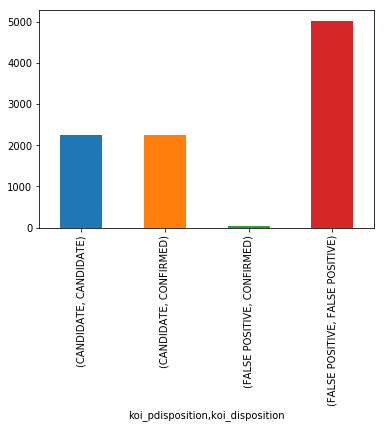

In [85]:
check_q5(kepler.groupby(['koi_pdisposition', 'koi_disposition']).rowid.count())

The next few exercises use the following datasets:

In [86]:
wine_reviews = pd.read_csv("../input/wine-reviews/winemag-data-130k-v2.csv", index_col=0)
wine_reviews.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [87]:
ramen_reviews = pd.read_csv("../input/ramen-ratings/ramen-ratings.csv", index_col=0)
ramen_reviews.head()

,Brand,Variety,Style,Country,Stars,Top Ten
Review #,,,,,,
2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


**Exercise 6**: As we demonstrated in previous workbooks, the `points` column in the `wine_reviews` dataset is measured on a 20-point scale between 80 and 100. Create a `Series` which normalizes the ratings so that they fit on a 1-to-5 scale instead (e.g. a score of 80 translates to 1 star, while a score of 100 is five stars). Set the `Series` name to "Wine Ratings", and sort by index value (ascending).

AxesSubplot(0.125,0.125;0.775x0.755)


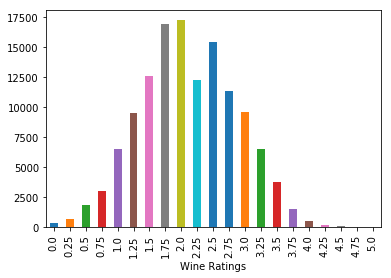

In [120]:
temp2 = wine_reviews.points.map(lambda x: (x-80)/4).value_counts().sort_index().rename_axis("Wine Ratings")
print (check_q6(temp2))
#check_q6(pd.Series(temp2, name='Wine Ratings'))
#wine_reviews.points.sort_values().plot.hist()

**Exercise 7**: The `Stars` column in the `ramen_reviews` dataset is the ramen equivalent to the similar data points in `wine_reviews`. Luckily it is already on a 0-to-5 scale, but it has some different problems...create a `Series` counting how many ramens earned each of the possible scores in the dataset. Convert the `Series` to the `float64` dtype and drop rames whose rating is `"Unrated"`. Set the name of the `Series` to "Ramen Ratings". Sort by index value (ascending).

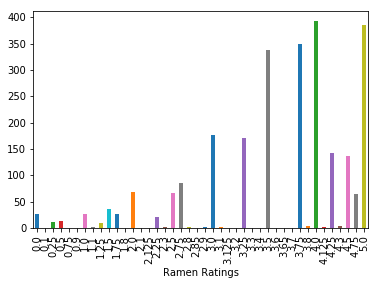

In [145]:
check_q7(ramen_reviews.Stars.replace('Unrated', None).dropna().astype('float64').value_counts().sort_index().rename_axis("Ramen Ratings"))
#answer_q7()

**Exercise 8**: We can see from the result of the previous exercise that whilst the wine reviewers stick to a strict 20-point scale, ramen reviews occassionally deviate into fractional numbers. Modify your answer to the previous exercise by rounding review scores to the nearest half-point (so 0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, or 5).

In [157]:
round(3.7, 0)

4.0

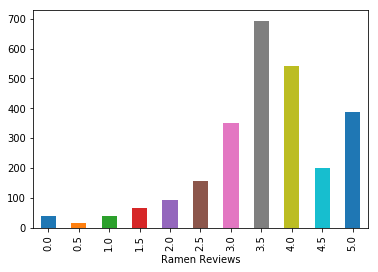

In [160]:
check_q8(ramen_reviews.Stars.replace('Unrated', None).dropna().astype('float64').map(lambda x: int(x) if x - int(x) < 0.5 else int(x) + 0.5).value_counts().sort_index().rename_axis("Ramen Reviews"))

# Congratulations

You've finished the Pandas track.  Many data scientist feel efficiency with Pandas is the most useful and practical skill they have, because it allows you to progress quickly in any project you have.

You can take advantage of your Pandas skills by entering a [Kaggle Competition](https://www.kaggle.com/competitions) or answering a question you find interesting using [Kaggle Datasets](https://www.kaggle.com/datasets).